# Business Analytics Project
In this project, we will explore data from Yandex.Afisha to help optimize marketing expenses. Our data sources include server logs with data on Yandex.Afisha visits from June 2017 through May 2018, dump file with all orders for the period, and
marketing expenses statistics. From this we will try to answer the following questions:
- How people use the product?
- When they start to buy?
- How much money each customer brings?
- When they pay off?



## Data

Our journey begins with the raw data, of which we have 3 datasets: visits, orders and costs. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    visits = pd.read_csv('visits_log_us.csv', parse_dates=['Start Ts', 'End Ts'], dtype={'Device': 'category'})
    orders = pd.read_csv('orders_log_us.csv', parse_dates=['Buy Ts'])
    costs = pd.read_csv('costs_us.csv', parse_dates=['dt'])
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv', parse_dates=['Start Ts', 'End Ts'], dtype={'Device': 'category'})
    orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])
    costs = pd.read_csv('/datasets/costs_us.csv', parse_dates=['dt'])

In [3]:
data = [visits, orders, costs]

for df in data:
    df.columns = df.columns.str.lower().str.replace(' ', '_')

### Visits
The visits table contains server logs with data on website visits from June 2017 through May 2018.

Columns:
- `uid` — user's unique identifier
- `device` — user's device
- `start_ts` — session start date and time
- `end_ts` — session end date and time
- `source_id` — identifier of the ad source the user came from

In [4]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
visits.describe(include='all').fillna('').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
device,359400,2,desktop,262567,NaT,NaT,,,,,,,
end_ts,359400,224760,2017-11-24 16:51:00,23,2017-06-01 00:02:00,2018-06-01 01:26:00,,,,,,,
source_id,359400,,,,NaT,NaT,3.75051,1.91712,1,3,4,5,10
start_ts,359400,224303,2017-11-24 16:06:00,19,2017-06-01 00:01:00,2018-05-31 23:59:00,,,,,,,
uid,359400,,,,NaT,NaT,9.20256e+18,5.29843e+18,1.18635e+13,4.61341e+18,9.22741e+18,1.37282e+19,1.84467e+19


In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null category
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


### Orders
The orders table contains data on orders.

Columns:
- `uid` — unique identifier of the user making an order
- `buy_ts` — order date and time
- `revenue` — Yandex.Afisha's revenue from the order

In [7]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [8]:
orders.describe(include='all').fillna('').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
buy_ts,50415,45991,2018-05-31 10:13:00,9,2017-06-01 00:10:00,2018-06-01 00:02:00,,,,,,,
revenue,50415,,NaT,,NaT,NaT,4.99965,21.8184,0,1.22,2.5,4.89,2633.28
uid,50415,,NaT,,NaT,NaT,9.09816e+18,5.28574e+18,3.13578e+14,4.53357e+18,9.10227e+18,1.36829e+19,1.84462e+19


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


### Costs
The costs table contains data on marketing expenses. 

Columns:
- `source_id` — ad source identifier
- `dt` — date
- `costs` — expenses on this ad source on this day

In [10]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [11]:
costs.describe(include='all').fillna('').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
source_id,2542,,NaT,,NaT,NaT,4.8572,3.18158,1,2,4,9,10
dt,2542,364,2018-03-03,7,2017-06-01,2018-05-31,,,,,,,
costs,2542,,NaT,,NaT,NaT,129.477,156.297,0.54,21.945,77.295,170.065,1788.28


In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


## Analysis

### Product
#### Usage Over Time

Before plotting we should create new columns, for gruoping by time period and for session lengths.

In [13]:
visits['sess_month'] = (visits['start_ts'] - pd.to_timedelta(visits['start_ts'].dt.day, unit='d')).dt.date
visits['sess_week'] = (pd.to_datetime(visits['start_ts'], unit='d') - 
                       pd.to_timedelta(visits['start_ts'].dt.weekday, unit='d')
                      ).dt.date
visits['sess_day'] = visits['start_ts'].dt.date
visits['sess_time_s'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

Below are plots for daily, weekly and monthly usage, by number of users and number of sessions (one user can have multiple sessions).

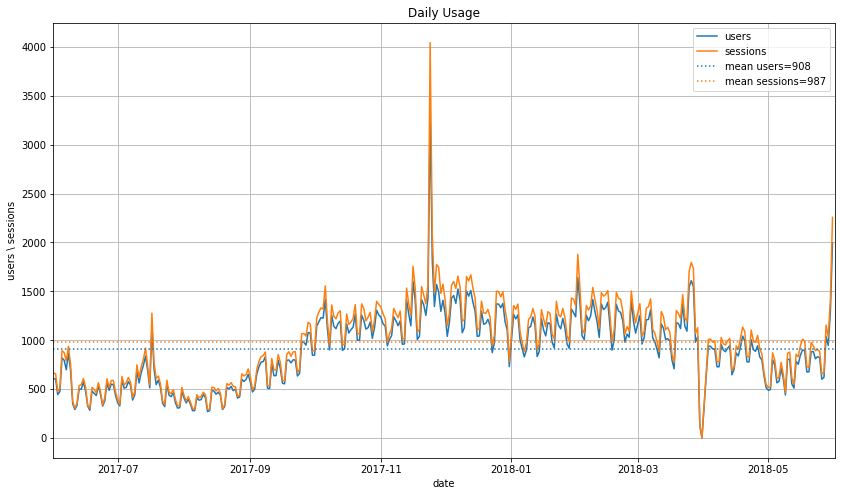

In [14]:
plt.figure(figsize=(14, 8))
plt.plot(visits.groupby('sess_day')['uid'].nunique(), label='users')
plt.plot(visits.groupby('sess_day')['uid'].count(), label='sessions')
plt.axhline(
    visits.groupby('sess_day')['uid'].nunique().mean(), 
    color='C0', 
    linestyle=':', 
    label=f"mean users={visits.groupby('sess_day')['uid'].nunique().mean().round().astype('int')}",
)
plt.axhline(
    visits.groupby('sess_day')['uid'].count().mean(), 
    color='C1', 
    linestyle=':', 
    label=f"mean sessions={visits.groupby('sess_day')['uid'].count().mean().round().astype('int')}"
)
plt.title('Daily Usage')
plt.xlabel('date')
plt.ylabel('users \ sessions')
plt.legend()
plt.xlim('2017-06-01', '2018-06-01')
plt.grid()
plt.show()

We see that late November 2017 there was an unusually busy day. On the other hand, there was a day with no sessions at all in the beggining of March 2018 (technical issue?). 

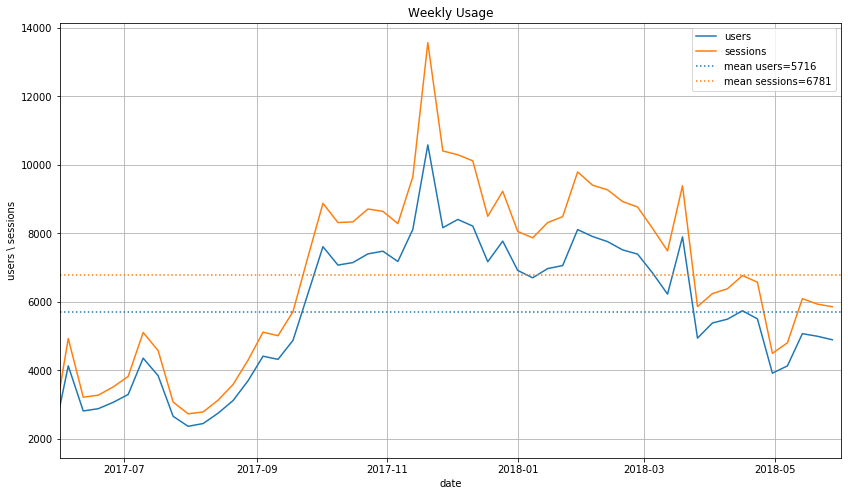

In [15]:
plt.figure(figsize=(14, 8))
plt.plot(visits.groupby('sess_week')['uid'].nunique(), label='users')
plt.plot(visits.groupby('sess_week')['uid'].count(), label='sessions')
plt.axhline(
    visits.groupby('sess_week')['uid'].nunique().mean(), 
    color='C0', 
    linestyle=':', 
    label=f"mean users={visits.groupby('sess_week')['uid'].nunique().mean().round().astype('int')}",
)
plt.axhline(
    visits.groupby('sess_week')['uid'].count().mean(), 
    color='C1', 
    linestyle=':', 
    label=f"mean sessions={visits.groupby('sess_week')['uid'].count().mean().round().astype('int')}"
)
plt.title('Weekly Usage')
plt.xlabel('date')
plt.ylabel('users \ sessions')
plt.legend()
plt.xlim('2017-06-01', '2018-06-01')
plt.grid()
plt.show()

The weekly usage is a essentially a smoothed out version of daily usage. It is now easier to see the trends: a sharp rise in August-September 2017, prominent peak in November, and the start of decline in March 2018.

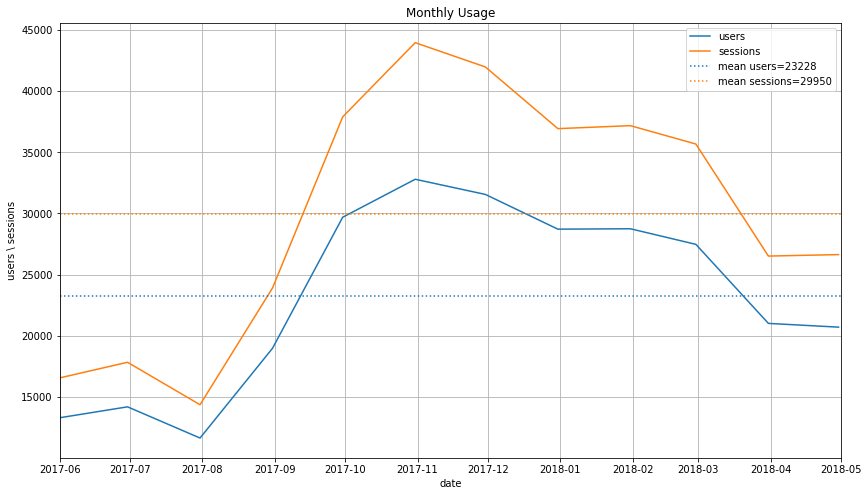

In [16]:
plt.figure(figsize=(14, 8))
plt.plot(visits.groupby('sess_month')['uid'].nunique(), label='users')
plt.plot(visits.groupby('sess_month')['uid'].count(), label='sessions')
plt.axhline(
    visits.groupby('sess_month')['uid'].nunique().mean(), 
    color='C0', 
    linestyle=':', 
    label=f"mean users={visits.groupby('sess_month')['uid'].nunique().mean().round().astype('int')}",
)
plt.axhline(
    visits.groupby('sess_month')['uid'].count().mean(), 
    color='C1', 
    linestyle=':', 
    label=f"mean sessions={visits.groupby('sess_month')['uid'].count().mean().round().astype('int')}"
)
plt.title('Monthly Usage')
plt.xlabel('date')
plt.ylabel('users \ sessions')
plt.legend()
plt.xlim('2017-06-01', '2018-05-01')
plt.grid()
plt.show()

In monthly view, we still see a prominent peak in usage around the end of November 2017. Usage have been above average for the period of October 2017 to March 2018. It could be due to seasonality, but we can't be sure withuot multi-year data.

#### Session Duration
Below is the distribution of session durations.

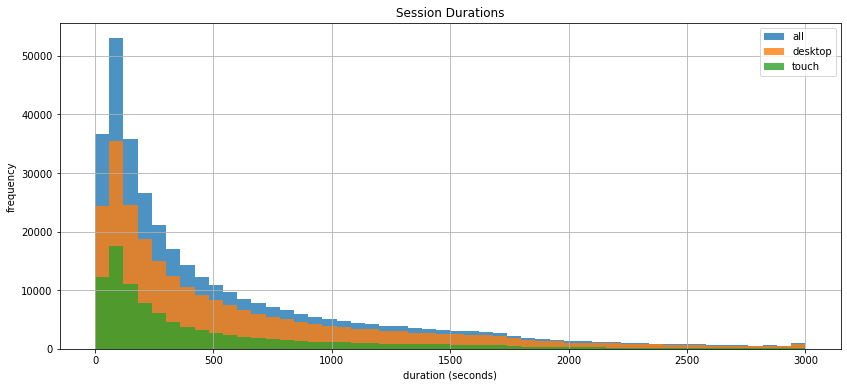

In [17]:
plt.figure(figsize=(14, 6))
plt.hist(visits['sess_time_s'], bins=50, range=(0, 3000), alpha=0.8, label='all')
plt.hist(visits.query('device == "desktop"')['sess_time_s'], bins=50, range=(0, 3000), alpha=0.8, label='desktop')
plt.hist(visits.query('device == "touch"')['sess_time_s'], bins=50, range=(0, 3000), alpha=0.8, label='touch')
plt.title('Session Durations')
plt.xlabel('duration (seconds)')
plt.ylabel('frequency')
plt.grid()
plt.legend()
plt.show()

The mean, standard deviation, quartiles and mode are shown in the following table.

In [18]:
visits['sess_time_s'].describe().append(pd.Series(visits['sess_time_s'].mode()[0], index=['mode']))

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
mode         60.000000
dtype: float64

The session duration distribution is strongly right-skewed. The typical session is at the one minute mark, while the median is 5 minutes, and the mean sits at nearly 11 minutes. It means a small proportion of all sessions are very long compared to the typical session. No difference found between devices.

#### Sessions per User
Below is the distribution of the total number of sessions for each user for the enitre dataset.

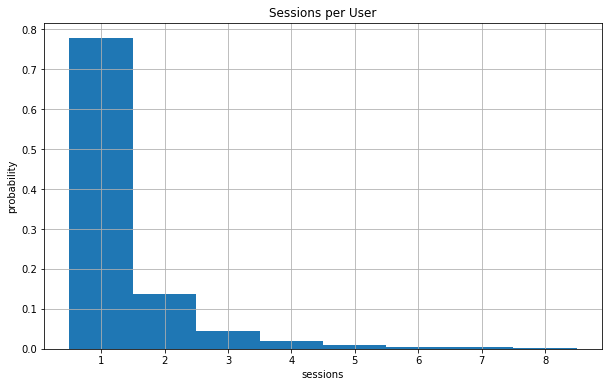

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(visits['uid'].value_counts(), bins=8, range=(0.5, 8.5), density=True)
plt.title('Sessions per User')
plt.xlabel('sessions')
plt.ylabel('probability')
plt.grid()
plt.show()

The numerical data for the above plot is shown in percentage in the following table.

In [20]:
((visits['uid'].value_counts().value_counts() / visits['uid'].nunique())*100).head(8).round(1).astype('str') + '%'

1    77.2%
2    13.6%
3     4.5%
4     1.9%
5     1.0%
6     0.5%
7     0.4%
8     0.2%
Name: uid, dtype: object

The mean number of sessions per user:

In [21]:
visits['uid'].value_counts().mean()

1.5751482453795214

Almost 80% of users only used the app once, nearly 15% used it twice and under 5% used it three times. Less than 5% of users logged in more than 3 times.

#### User Retention
Retention rate is shown in percentage from initial cohort size.

In [22]:
first_visits = visits.groupby(['uid'])['start_ts'].min()
first_visits.name = 'first_sess'

visits = visits.join(first_visits, on='uid')

visits['first_sess_month'] = visits['first_sess'].astype('datetime64[M]')
visits['sess_month'] = visits['start_ts'].astype('datetime64[M]')
visits['lifetime'] = (
    (visits['sess_month'] - visits['first_sess_month']) / np.timedelta64(1, 'M')
).round().astype('int')



In [23]:
cohort_visits = visits.groupby(['first_sess_month', 'lifetime']).agg({'uid': 'nunique'}).reset_index()
visits_cohort_size = cohort_visits[cohort_visits['lifetime'] == 0][['first_sess_month', 'uid']].rename(
    columns={'uid': 'cohort_users'}
)
cohort_visits = cohort_visits.merge(visits_cohort_size, on='first_sess_month')
cohort_visits['retention'] = cohort_visits['uid'] / cohort_visits['cohort_users']

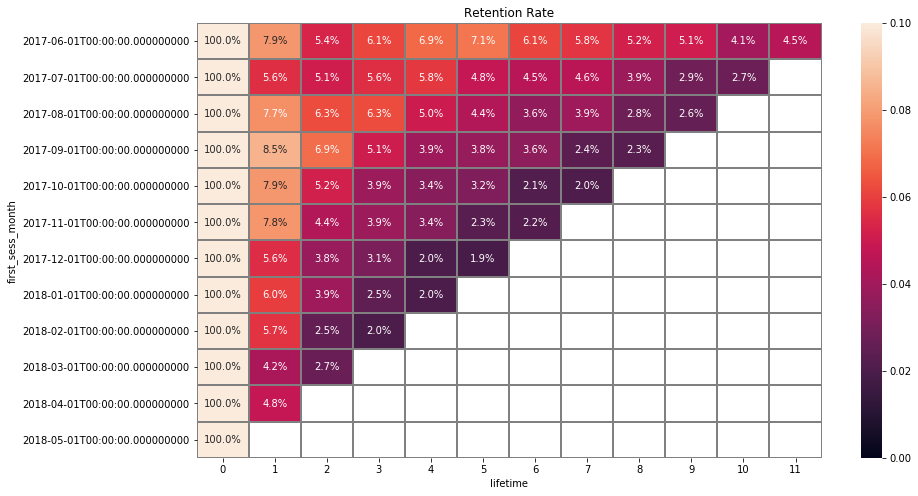

In [24]:
pivot_visits = cohort_visits.pivot_table(
    index='first_sess_month',
    columns='lifetime',
    values='retention',
)

plt.figure(figsize=(14, 8))
plt.title('Retention Rate')
sns.heatmap(
    pivot_visits,
    vmin=0, vmax=0.1,
#     cmap='hot',
    annot=True,
    fmt='.1%',
    linewidths=1,
    linecolor='gray',
)
plt.show()

Retention was always less than 10%. The best retention on the second month was 8.5%, on the September 2017 cohort, and the worst was 4.2% on the March 2018 cohort.

### Sales
#### Conversion Time
We will measure the conversion time in days from first visit to first order.

In [25]:
first_visits = visits.groupby(['uid'])['start_ts'].min()
first_visits.name = 'first_visit'
orders = orders.join(first_visits, on='uid', how='left')

first_orders = orders.groupby('uid')['buy_ts'].min()
first_orders.name = 'first_order'
orders = orders.join(first_orders, on='uid')

orders['days_to_conversion'] = ((orders['first_order'] - orders['first_visit']) / pd.Timedelta('1d')).dropna().astype('int')

The mean, standard deviation and quartiles are shown in the following table.

In [26]:
orders.query('days_to_conversion >= 0')['days_to_conversion'].describe()

count    50415.000000
mean        17.419677
std         46.352290
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max        363.000000
Name: days_to_conversion, dtype: float64

It would also be useful to see the data in percentages.

In [27]:
((orders.groupby('uid')['days_to_conversion'].mean().dropna().astype('int').value_counts() / 
  orders['uid'].nunique()
 )*100).head().add_prefix('conversion ').add_suffix('d').round(1).astype('str') + '%'

conversion 0d    72.2%
conversion 1d     2.8%
conversion 2d     1.5%
conversion 3d     1.2%
conversion 4d     0.9%
Name: days_to_conversion, dtype: object

Over 70% of buyers made the first order on the day of registration. Nevertheless, the average time to conversion is 16.4 days, meaning some users really take their time.

#### Number of Orders
For this analysis, we'll split users into cohorts based on month of first order, and see how the number of orders per ~month~ user changed over each cohort's lifetime.

In [28]:
orders['first_order_month'] = orders['first_order'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['lifetime'] = ((orders['order_month'] - orders['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int')

In [29]:
cohort_orders = orders.groupby(['first_order_month', 'lifetime'])['uid'].agg(['nunique', 'count']).reset_index()
cohort_orders['per_user'] = cohort_orders['count'] / cohort_orders['nunique']
# cohort_orders.head()

In [30]:
pivot_orders = cohort_orders.pivot_table(
    index='first_order_month', 
    columns='lifetime', 
    values='per_user', 
)

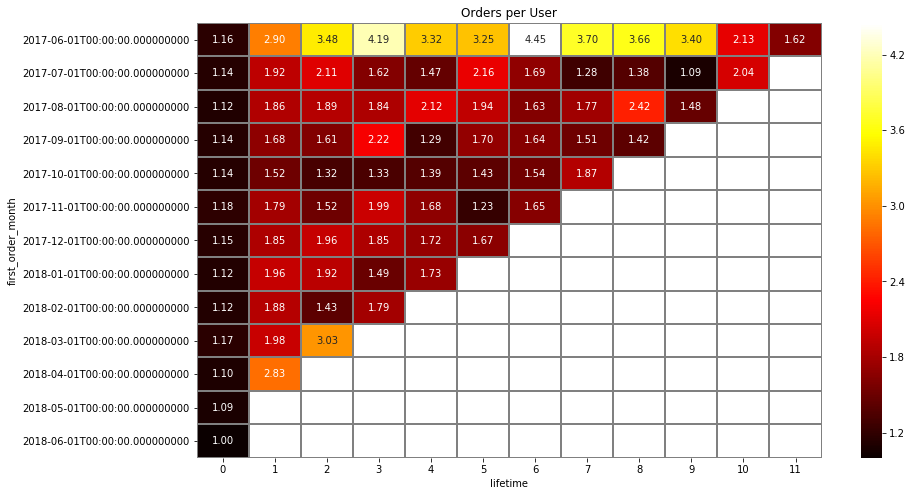

In [31]:
plt.figure(figsize=(14, 8))
plt.title('Orders per User')
sns.heatmap(
    pivot_orders,
    cmap='hot',
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
)
plt.show()

We see that while retention is low, the users that do stay make more orders on average. It is particularily evident in the June 2017 cohort. 

#### Revenue
The mean revenue per order is

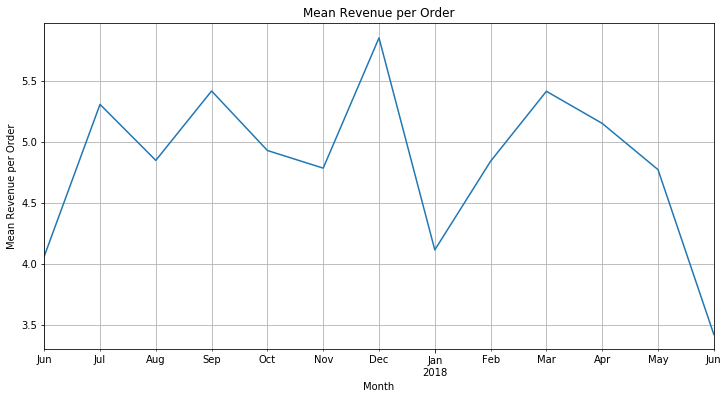

In [32]:
plt.figure(figsize=(12, 6))
plt.title('Mean Revenue per Order')
orders.groupby('order_month')['revenue'].mean().plot()
plt.xlabel('Month')
plt.ylabel('Mean Revenue per Order')
plt.grid(which='both')
plt.show()

And the mean revenue per user is

In [33]:
orders.groupby('uid')['revenue'].sum().mean().round(2)

6.9

In the following table, we see the revenue for each month for each cohort

In [34]:
pivot_revenue = orders.pivot_table(
    index='first_order_month', 
    columns='lifetime', 
    values='revenue', 
    aggfunc='sum',
#     margins='all',
)

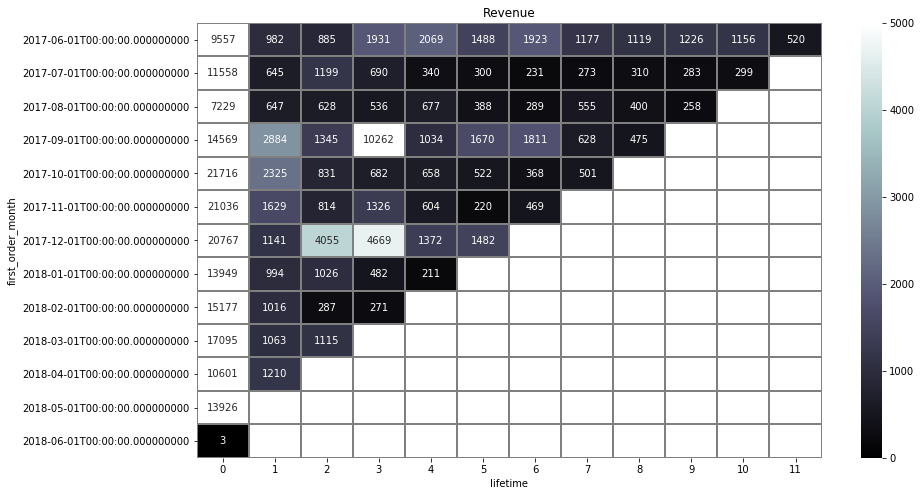

In [35]:
plt.figure(figsize=(14, 8))
plt.title('Revenue')
sns.heatmap(
    pivot_revenue,
    vmin=0, vmax=5000,
    cmap='bone',
    annot=True,
    fmt='.0f',
    linewidths=1,
    linecolor='gray',
)
plt.show()

Unsurprisingly, revenue is high on the first month and then drops sharply. There was high revenue from September 2017 cohort on their 4th month, despite a low number of orders, meaning they were paying more per order.

The lifetime value is shown below.

In [36]:
revenue_per_user = (orders.groupby(['first_order_month', 'lifetime'])['revenue'].sum()
                    /orders.groupby(['first_order_month'])['uid'].nunique()
                   ).reset_index()
ltv = revenue_per_user.pivot_table(index='first_order_month', columns='lifetime', values=0).cumsum(axis=1)

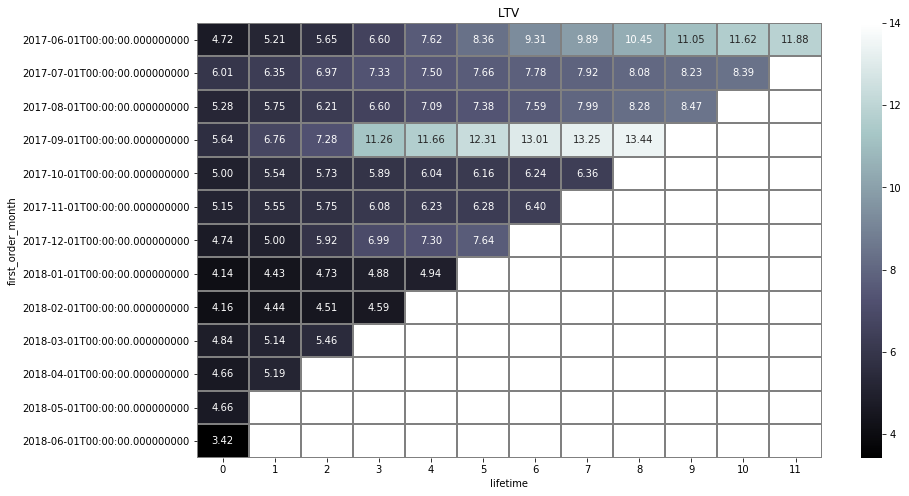

In [37]:
plt.figure(figsize=(14, 8))
plt.title('LTV')
sns.heatmap(
    ltv,
    vmax=14,
    cmap='bone',
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
)
plt.show()

The lifetime value of a customer depends on cohort. For the first one, it reaches near 12 currency units for a one-year time period. The most profitable cohort, September 2017, reached 13.44 currency units in just 9 months.

### Marketing
#### Costs
The total expenses were:

In [38]:
costs['costs'].sum()

329131.62

Grouped by source:

In [39]:
costs.groupby('source_id')['costs'].sum()

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

And over time:

In [40]:
costs['dt_month'] = costs['dt'].astype('datetime64[M]')

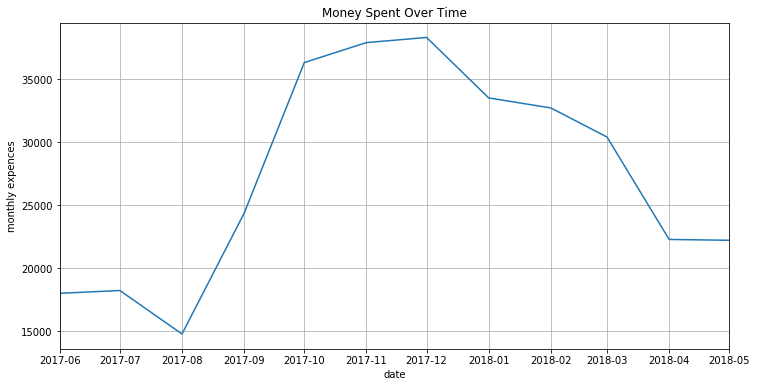

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(costs.groupby(['dt_month'])['costs'].sum())
plt.grid()
plt.title('Money Spent Over Time')
plt.xlabel('date')
plt.ylabel('monthly expences')
plt.xlim('2017-06-01', '2018-05-01')
plt.show()

It correlates nicely to the app usage.

Next, we'll look at the costs over time for each source.

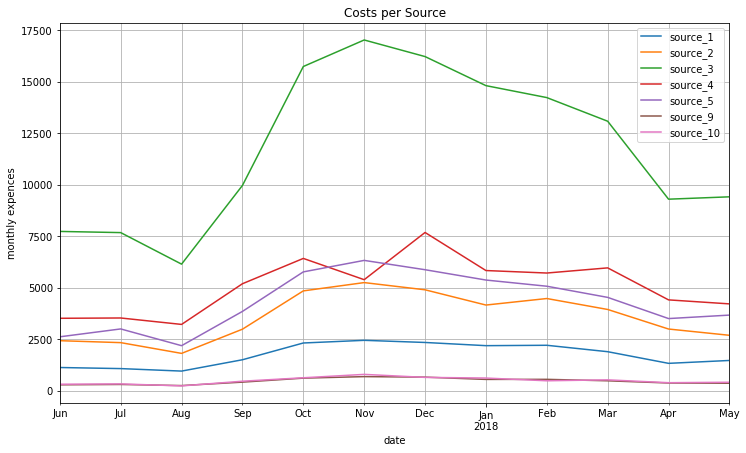

In [42]:
by_source = pd.DataFrame()
for id in costs['source_id'].unique():
# for id in [9]:
    by_source[f'source_{id}'] = (
        costs[costs['source_id'] == id].groupby('dt_month')['costs'].sum() 
#         / orders.groupby('first_order_month')['uid'].nunique()
    )
# by_source['total'] = by_source.sum(axis=1)

by_source.plot(figsize=(12, 7))
plt.grid(which='both')
plt.title('Costs per Source')
plt.xlabel('date')
plt.ylabel('monthly expences')
plt.show()

Here we see that source 3 clearly costed more money than the others, and by far - in most months more than twice the second highest, source 4. Sources 9 and 10 were the cheapest, followed by source 1. 

#### Cotumer Aquisition Costs
Below is the average cost to convert one customer

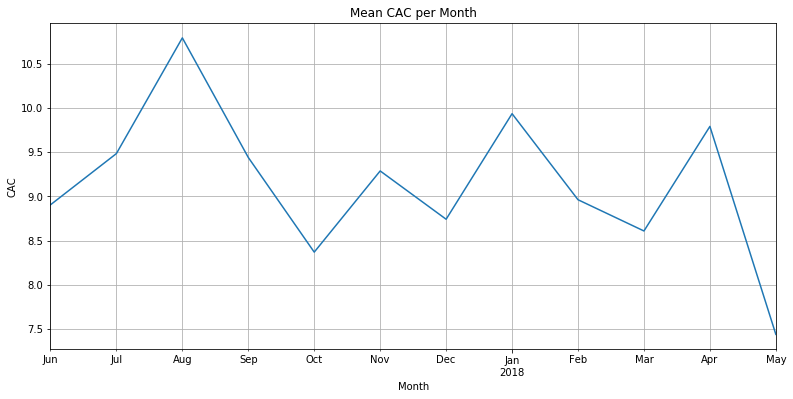

In [43]:
mean_cac = pd.concat(
    [
        orders.groupby(['first_order_month'])['uid'].nunique(),
        costs.groupby(['dt_month'])['costs'].sum()
    ], axis=1
)
mean_cac['cac'] = mean_cac['costs'] / mean_cac['uid']

mean_cac['cac'].plot(figsize=(13, 6))
plt.grid(which='both')
plt.title('Mean CAC per Month')
plt.xlim('2017-06-01', '2018-05-01')
plt.xlabel('Month')
plt.ylabel('CAC')
plt.show()

It goes from 7.5 currency units to just shy of 11 currency units. We can learn more if we split it by source.

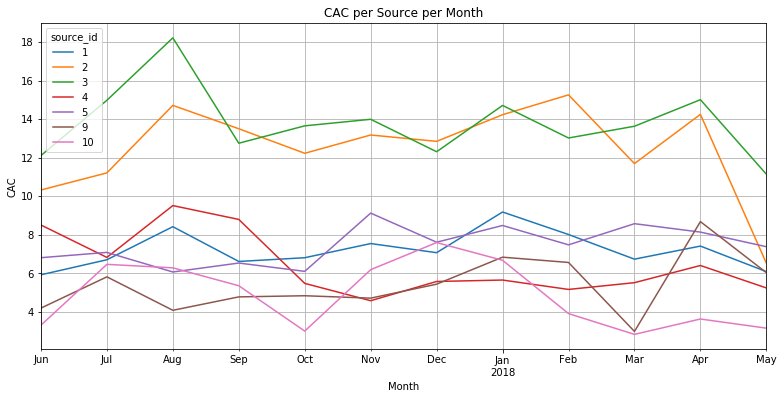

In [44]:
s_costs = costs.groupby(['dt_month', 'source_id'])['costs'].sum()
s_users = (
    orders
    .merge(visits.query('start_ts == first_sess'), on='uid')
    .groupby(['first_order_month', 'source_id'])['uid']
    .nunique()
)
s_cac = pd.concat([s_users, s_costs], axis=1).reset_index()
s_cac.columns = ['month', 'source_id', 'n_aquired', 'costs']
s_cac['cac'] = s_cac['costs'] / s_cac['n_aquired']

s_cac.pivot_table(index='month', columns='source_id', values='cac').plot(figsize=(13, 6))
plt.grid(which='both')
plt.title('CAC per Source per Month')
plt.xlabel('Month')
plt.ylabel('CAC')
plt.show()

Now we see that some sources are more expansive than others per customer aquired. Sources 2 and 3 are almost entirely above 10 currency units, with source 3 reaching over 18 currency units. All other sources are entirely below 10 currency units.

#### Return on Investment
The following tables show the return on investment as the ratio of revenue to costs, separately for each source. 

In [45]:
cohorts = (
    orders
    .merge(visits.query('start_ts == first_sess'), on='uid', suffixes=['', '_visits'])
    .groupby(['source_id', 'first_order_month', 'order_month'])
    .agg({'revenue': 'sum', 'lifetime': 'mean', 'uid': 'nunique'})
    .reset_index()
)
# cohorts = cohorts.merge(orders.groupby('first_order_month')['uid'].nunique(), on='first_order_month')
cohorts = cohorts.merge(s_cac, left_on=['source_id', 'first_order_month'], right_on=['source_id', 'month'])
cohorts['roi'] = cohorts['revenue'] / cohorts['costs']
cohorts = cohorts.dropna(subset=['roi'])

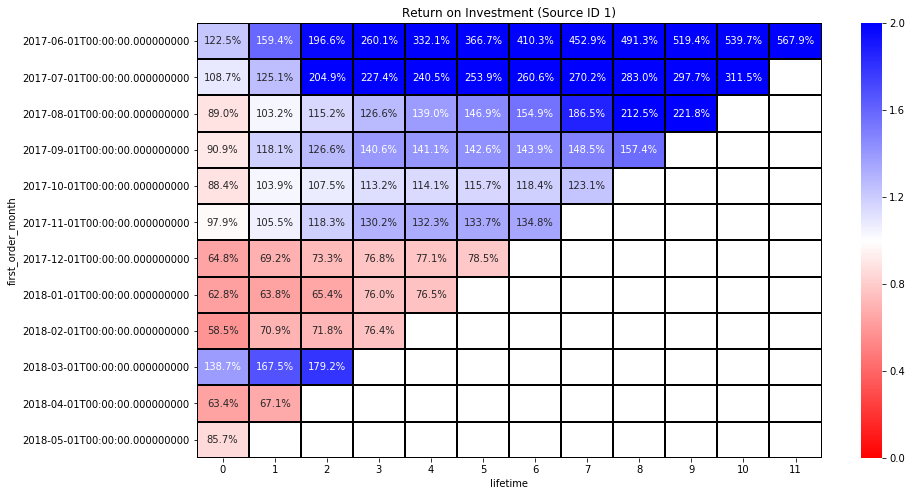

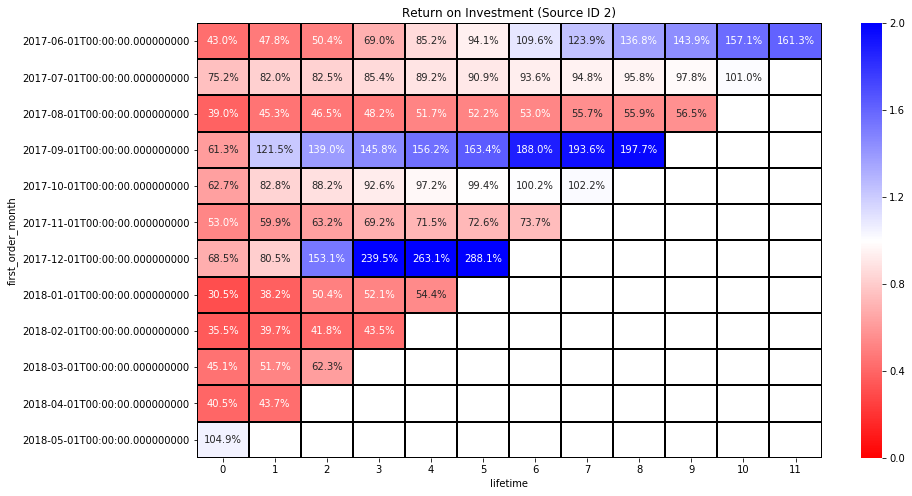

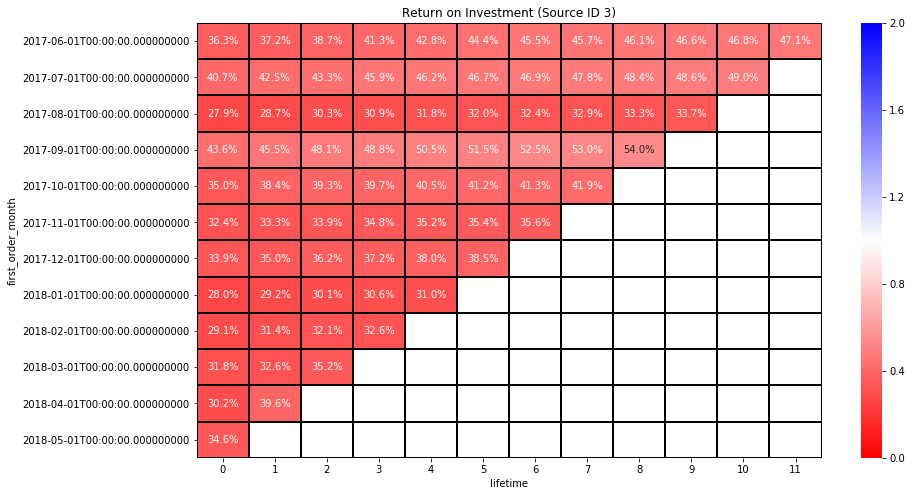

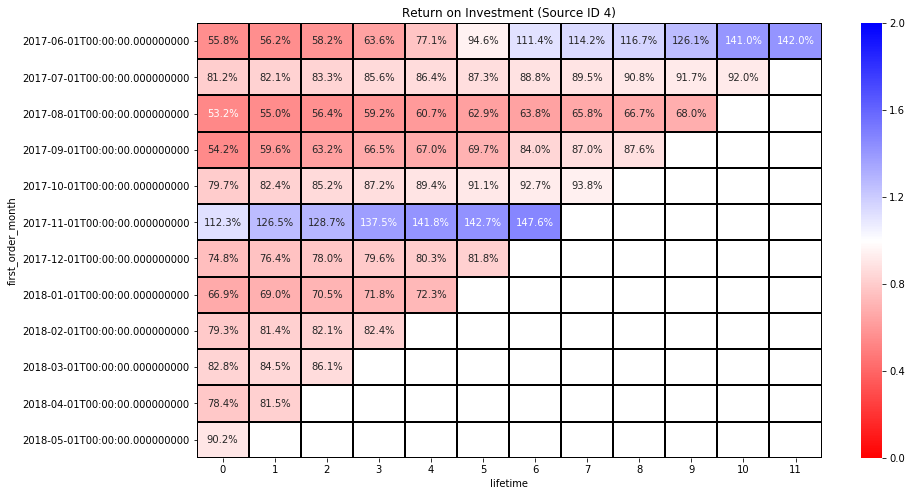

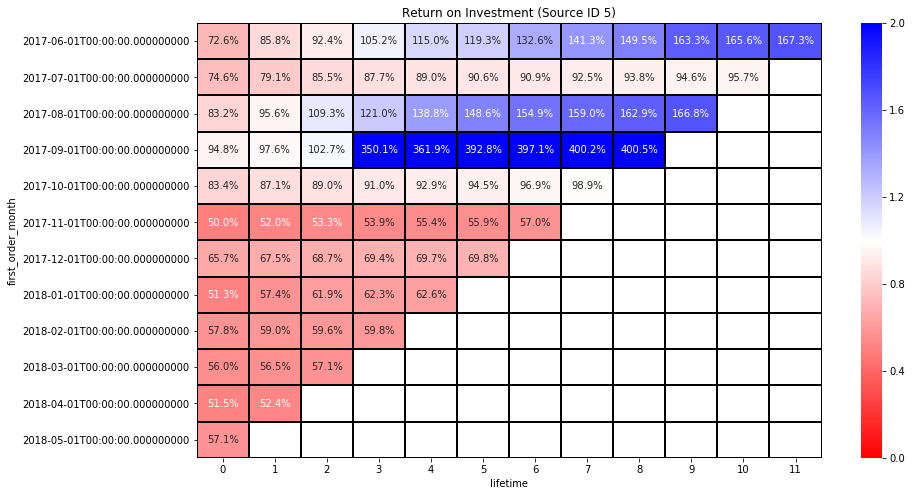

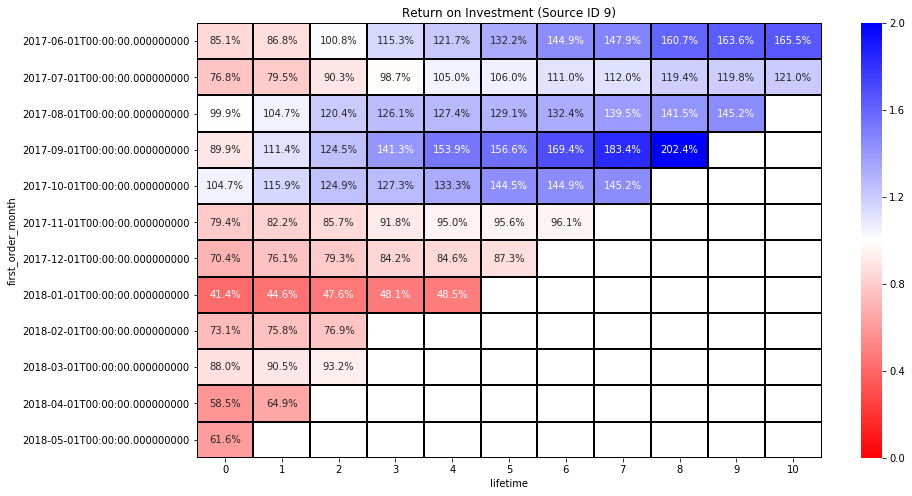

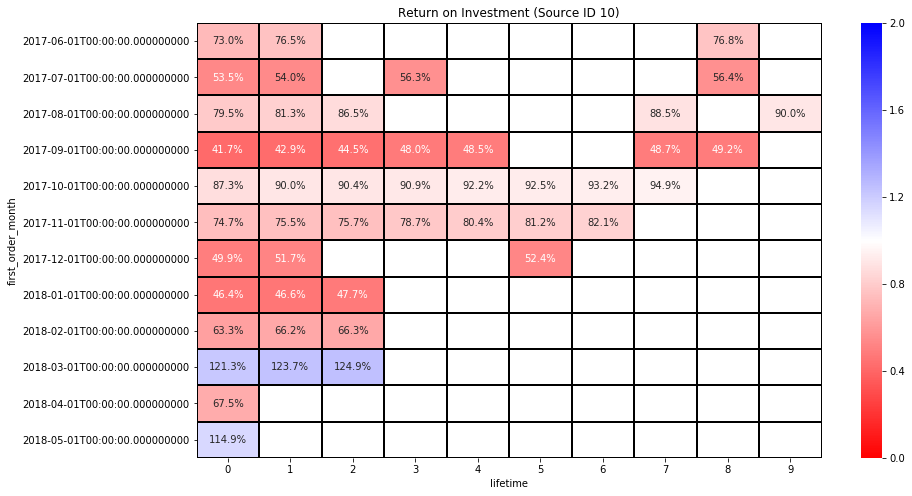

In [46]:
for id in cohorts['source_id'].unique():
    output = cohorts.query('source_id == @id').pivot_table(
        index='first_order_month', columns='lifetime', values='roi', aggfunc='mean'
    )

    plt.figure(figsize=(14, 8))
    plt.title(f'Return on Investment (Source ID {id})')
    sns.heatmap(
        output.cumsum(axis=1),
        vmin=0.0, vmax=2.0,
        center=1,
        cmap='bwr_r',
        annot=True,
        fmt='.1%',
        linewidths=1,
        linecolor='black',
    )
    plt.show()

Source 1 is definitely paying off. Sources 9 and 5 are also doing well. The source 5, September 2017 cohort is particularly lucrative, but performance dropped considerably from November 2017 onward. Source 4 seems to take longer to pay off. Source 2 (an expansive one) has mixed results - some cohorts payed off quickly, other took a while, and some aren't anywhere near. Source 10 did poorly overall, but managed the pay off in one month on 2 of the last 3 months. Lastly, source 3, the most expansive one, failed miserably to return the invesment, not even reaching 55% ROI in any cohort. 

## Conclusion

 - Usage have been above average for the period of October 2017 to March 2018, peaking in November 2017.
 - A typical session lasts one minute.
 - Almost 80% of users only used the app once.
 - Over 70% of buyers made the first order on the day of registration.
 - Retention rate on the second month from first order was no more than 8.5%.
 - The mean number of orders per user rises after the first month of use.
 - Revenue is high on the first month and then drops sharply.
 - The lifetime value of a customer greatly depends on the month of first order.
 - Marketing expenses correlate to the app usage rates.
 - Source 3 was the most expensive, both overall based on CAC.
 - Sources 1, 4 and 9 consistently return the investment.
 - Sources 2 and 5 had mixed, but overall good, return on investment.
 - Sources 3 and 10 made poor return on investment.